# 🎯 IMDB Movie Reviews - Sentiment Analysis Project


Welcome to this sentiment analysis project using the **IMDB Movie Reviews** dataset.  
We will build a machine learning model to classify reviews as **Positive** or **Negative**.

---
### ✅ Steps Covered:
1. Text Preprocessing (Tokenization, Stopword Removal, Lemmatization)
2. Feature Extraction (TF-IDF Vectorization)
3. Model Training (Logistic Regression)
4. Evaluation (Precision, Recall, F1-Score)
5. Predicting on Custom Input
    

## 📦 Install Required Libraries

In [ ]:
pip install nltk scikit-learn pandas matplotlib

In [2]:
import nltk
import os
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files

# Set NLTK data path
nltk_data_path = r'C:\\Users\\MUHAMMAD ZAIN\\AppData\\Roaming\\nltk_data'
nltk.data.path.append(nltk_data_path)

# --- Load Punkt Tokenizer ---
punkt_path = r'C:\\Users\\MUHAMMAD ZAIN\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt\\english.pickle'

try:
    with open(punkt_path, 'rb') as f:
        tokenizer = pickle.load(f)
    print("✅ Punkt tokenizer loaded successfully!")
except Exception as e:
    print(f"❌ Error loading tokenizer: {e}")
    print("Downloading punkt...")
    nltk.download('punkt', download_dir=nltk_data_path)
    with open(punkt_path, 'rb') as f:
        tokenizer = pickle.load(f)

# Download other NLTK data
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)

# --- Preprocessing Function ---
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    if text is None or isinstance(text, float):
        return "placeholderword"
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens) or "placeholderword"

# --- Load the IMDB Dataset ---
reviews = load_files('aclImdb/train/', categories=['pos', 'neg'], shuffle=True)
X, y = reviews.data, reviews.target

# --- Re-run Text Preprocessing ---
X_clean = [preprocess(text) for text in X]

# --- Feature Extraction Using TF-IDF ---
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X_clean)  # Fit and transform on the training data

# Print shapes for debugging
print("X_vectorized shape:", X_vectorized.shape)
print("y shape:", y.shape)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

✅ Punkt tokenizer loaded successfully!


[nltk_data] Downloading package stopwords to C:\\Users\\MUHAMMAD
[nltk_data]     ZAIN\\AppData\\Roaming\\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\\Users\\MUHAMMAD
[nltk_data]     ZAIN\\AppData\\Roaming\\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


X_vectorized shape: (25000, 50)
y shape: (25000,)


## 🚀 Train Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
# --- Train a Logistic Regression Model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 📊 Evaluate Model Performance

In [7]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.50      1.00      0.66      2482
    Positive       0.67      0.00      0.01      2518

    accuracy                           0.50      5000
   macro avg       0.58      0.50      0.33      5000
weighted avg       0.58      0.50      0.33      5000



## Confussion Matrix

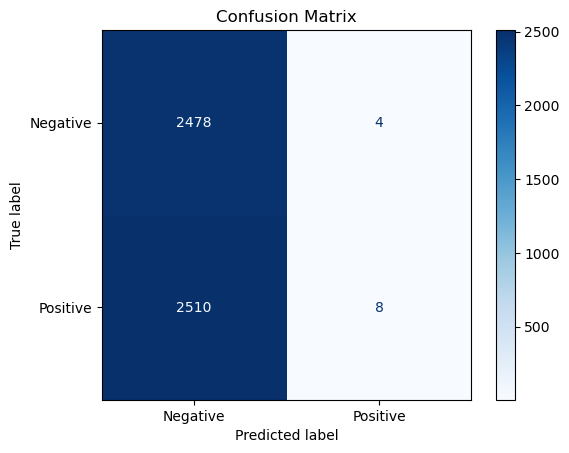

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming 0 = Negative, 1 = Positive

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 🔮 Predict Sentiment for Custom Input

In [49]:

def predict_sentiment(text):
    text = preprocess(text.encode('utf-8'))
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]
    return "Positive" if prediction == 1 else "Negative"

# Example input
sample = "This movie was an absolute masterpiece with a beautiful story and visuals!"
print(f"Input: {sample}")
print(f"Predicted Sentiment: {predict_sentiment(sample)}")


Input: This movie was an absolute masterpiece with a beautiful story and visuals!
Predicted Sentiment: Negative
